# Measures of Central Tendency

Central tendency characterizes one central value for the entire distribution. Measures under this include mean, median, and mode.

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The database has 33 variables. We are going to work with a subset of them:

- **school**: student's school (***`binary`***: 'GP' or 'MS')
- **sex**: student's sex (***`binary`***: 'F' - female or 'M' - male)
- **age**: student's age (***`numeric`***: from 15 to 22)
- **Pstatus**: parent's cohabitation status (***`binary`***: 'T' - living together or 'A' - apart)
- **studytime**: weekly study time (***`numeric`***: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **schoolsup**: extra educational support (***`binary`***: yes or no)
- **internet**: Internet access at home (***`binary`***: yes or no)
- **G1**: first period grade (***`numeric`***: from 0 to 20)
- **G2**: second period grade (***`numeric`***: from 0 to 20)
- **G3**: final grade (***`numeric`***: from 0 to 20, output target)

In [4]:
data = data[['school','sex','age','Pstatus','studytime','schoolsup','internet','G1','G2','G3']]
print(data.shape)
data.head()

(395, 10)


,school,sex,age,Pstatus,studytime,schoolsup,internet,G1,G2,G3
0,GP,F,18,A,2,yes,no,5,6,6
1,GP,F,17,T,2,no,yes,5,5,6
2,GP,F,15,T,2,yes,yes,7,8,10
3,GP,F,15,T,3,no,yes,15,14,15
4,GP,F,16,T,2,no,no,6,10,10


## Mode

Mode is the value that appears most often.

Let's remember the distribution of variable `school`:

In [5]:
data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [6]:
data.school.mode()

0    GP
Name: school, dtype: object

Mode is the highest bar.

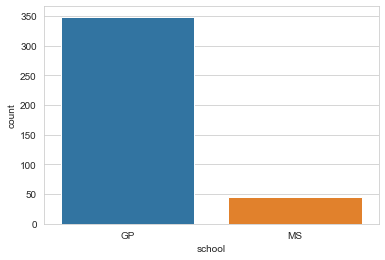

In [7]:
sns.countplot(x = data.school);

Let's analyse other variables.

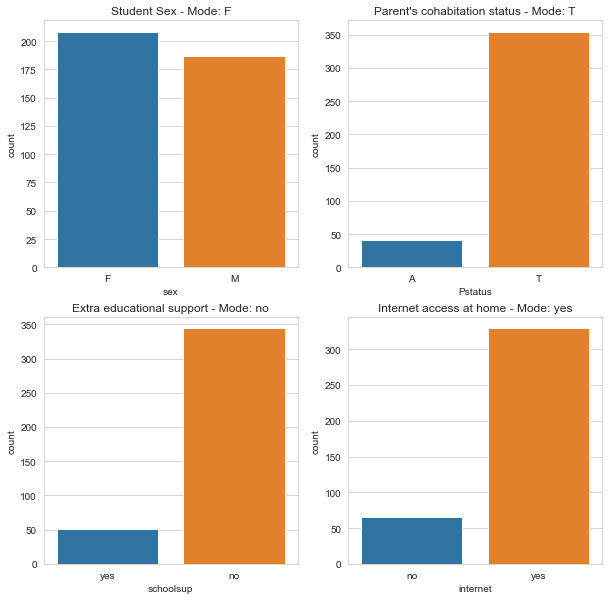

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.countplot(x=data.sex)
plt.title('Student Sex - Mode: F')

plt.subplot(222)
sns.countplot(x=data.Pstatus)
plt.title("Parent's cohabitation status - Mode: T")

plt.subplot(223)
sns.countplot(x=data.schoolsup)
plt.title('Extra educational support - Mode: no')

plt.subplot(224)
sns.countplot(x=data.internet)
plt.title('Internet access at home - Mode: yes');

Let's analyse another example.

In [9]:
df = pd.DataFrame({'a':[1,1,1,2,2,2,3,3]}) 
df.head()

,a
0,1
1,1
2,1
3,2
4,2


In [10]:
df.groupby('a').size()

a
1    3
2    3
3    2
dtype: int64

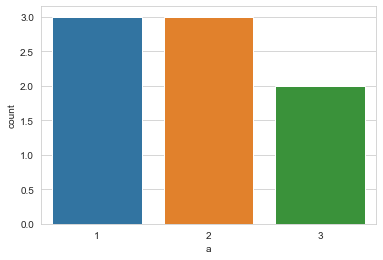

In [11]:
sns.countplot(x = df.a);

In [12]:
df.a.mode()

0    1
1    2
Name: a, dtype: int64

The variable `a` has two modes: the values 1 and 2.

**Conclusion**: A variable may have more than one mode.

## Mean

The arithmetic mean, also called the expected value or average, is the central value of a set of numbers: specifically, the sum of the values divided by the number of values.

Calculating the mean of G1, G2, and G3:

In [13]:
print('Mean of G1 = %.2f' %(data.G1.mean()))
print('Mean of G2 = %.2f' %(data.G2.mean()))
print('Mean of G3 = %.2f' %(data.G3.mean()))

Mean of G1 = 10.91
Mean of G2 = 10.71
Mean of G3 = 10.42


The `mean` is always between `min` and `max` values.

In [14]:
print('\tG1: \tMin = %.2f \tMean = %.2f \tMax = %.2f'%(data.G1.min(), data.G1.mean(), data.G1.max()))
print('\tG2: \tMin = %.2f \tMean = %.2f \tMax = %.2f'%(data.G2.min(), data.G2.mean(), data.G2.max()))
print('\tG3: \tMin = %.2f \tMean = %.2f \tMax = %.2f'%(data.G3.min(), data.G3.mean(), data.G3.max()))

	G1: 	Min = 3.00 	Mean = 10.91 	Max = 19.00
	G2: 	Min = 0.00 	Mean = 10.71 	Max = 19.00
	G3: 	Min = 0.00 	Mean = 10.42 	Max = 20.00


The following graphs represent histograms. The vertical black line in each of them is the mean value.

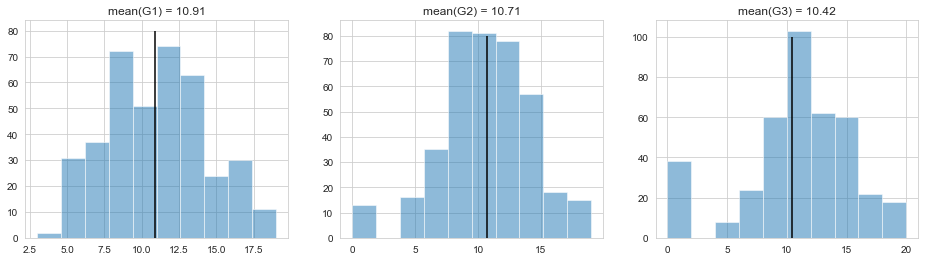

In [15]:
plt.figure(figsize=(16,4))

plt.subplot(131)
plt.hist(data.G1, alpha=0.5)
m = round(np.mean(data.G1),2)
plt.title('mean(G1) = ' + str(m))
plt.vlines(x=m, ymin=0, ymax=80, color='black');

plt.subplot(132)
plt.hist(data.G2, alpha=0.5)
m = round(np.mean(data.G2),2)
plt.title('mean(G2) = ' + str(m))
plt.vlines(x=m, ymin=0, ymax=80, color='black');

plt.subplot(133)
plt.hist(data.G3, alpha=0.5)
m = round(np.mean(data.G3),2)
plt.title('mean(G3) = ' + str(m))
plt.vlines(x=m, ymin=0, ymax=100, color='black');

The mean is affected by outliers. Let's see it!

In [16]:
grades = [10, 12, 14, 15, 12, 16, 17, 18, 16, 20]
print('Mean = %.2f' %(np.mean(grades)))

Mean = 15.00


Suppose we want to add a grade of a new student: 18. Instead of adding 18, we added 180 by mistake. Let's see how the value of the mean is affected due to it.

In [17]:
grades.append(180)
print(grades)
print('Mean = %.2f' %(np.mean(grades)))

[10, 12, 14, 15, 12, 16, 17, 18, 16, 20, 180]
Mean = 30.00


The mean is affected by the extreme values. 

Let's introduce another measure without that problem.

## Median

The `median` is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average. The median is sometimes used as opposed to the mean when there are outliers in the sequence that might skew the average of the values.

Calculating the median of G1, G2, and G3.

In [18]:
print('Median of G1 = %.2f' %(data.G1.median()))
print('Median of G2 = %.2f' %(data.G2.median()))
print('Median of G3 = %.2f' %(data.G3.median()))

Median of G1 = 11.00
Median of G2 = 11.00
Median of G3 = 11.00


Let's show another example.

`df` is a DataFrame with 8 values.

In [19]:
df.a = [1,2,3,4,5,6,7,8]
df

,a
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [20]:
df.a.median()

4.5

As you can see, the median does not always belong to the dataset.

## Quartiles

`Quartiles` are values that divide your data into quarters.

The four quarters that divide a data set into quartiles are: <br>
1) The lowest 25% of numbers. <br>
2) The next lowest 25% of numbers (up to the median). <br>
3) The second highest 25% of numbers (above the median). <br>
4) The highest 25% of numbers.

The three quartiles are:
- **`Q1`**: the middle number between the minimum and the median. A 25% of the data is below this point.
- **`Q2`**: is the median of the dataset. A 50% of the data is below this point.
- **`Q3`**: the middle number between the median and the maximum. A 75% of the data is below this point.

In [21]:
print('Quartiles of G1')
data.G1.quantile([0.25, 0.5, 0.75])

Quartiles of G1


0.25     8.0
0.50    11.0
0.75    13.0
Name: G1, dtype: float64

In [22]:
print('Quartiles of G2')
data.G2.quantile([0.25, 0.5, 0.75])

Quartiles of G2


0.25     9.0
0.50    11.0
0.75    13.0
Name: G2, dtype: float64

In [23]:
print('Quartiles of G3')
data.G3.quantile([0.25, 0.5, 0.75])

Quartiles of G3


0.25     8.0
0.50    11.0
0.75    14.0
Name: G3, dtype: float64

In [24]:
# Other way
print('Quartiles of G3')
print('Q1 = ',np.percentile(data.G3, 25))
print('Q2 = ',np.percentile(data.G3, 50))
print('Q3 = ',np.percentile(data.G3, 75))

Quartiles of G3
Q1 =  8.0
Q2 =  11.0
Q3 =  14.0


## Percentiles

**`Percentiles`**: each of the 100 equal groups into which a population can be divided according to the distribution of values of a particular variable

In [25]:
print('G1 Score')
print('20 percentile = ',np.percentile(data.G1, 20))
print('80 percentile = ',np.percentile(data.G1, 80))

G1 Score
20 percentile =  8.0
80 percentile =  14.0


## Box Plot 

A `boxplot` (also known as box and whisker plot) is a type of chart often used in explanatory data analysis to visually show the data quartiles (or percentiles) and averages.

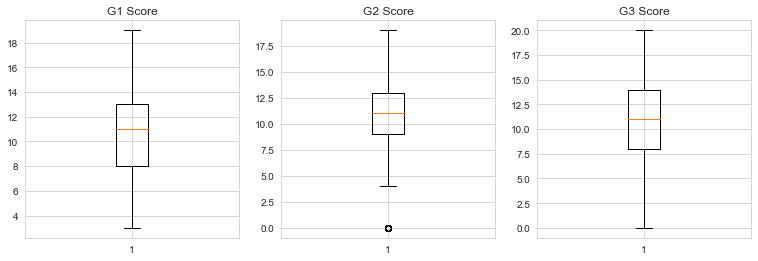

In [26]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.boxplot(data.G1)
plt.title('G1 Score')

plt.subplot(132)
plt.boxplot(data.G2)
plt.title('G2 Score')

plt.subplot(133)
plt.boxplot(data.G3)
plt.title('G3 Score');

Including the mean value

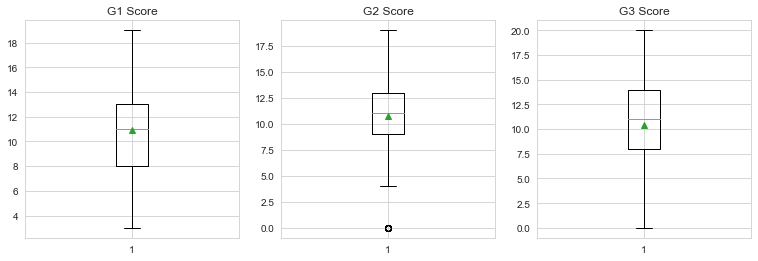

In [27]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.boxplot(data.G1, showmeans=True)
plt.title('G1 Score')

plt.subplot(132)
plt.boxplot(data.G2, showmeans=True)
plt.title('G2 Score')

plt.subplot(133)
plt.boxplot(data.G3, showmeans=True)
plt.title('G3 Score');

Using seaborn:

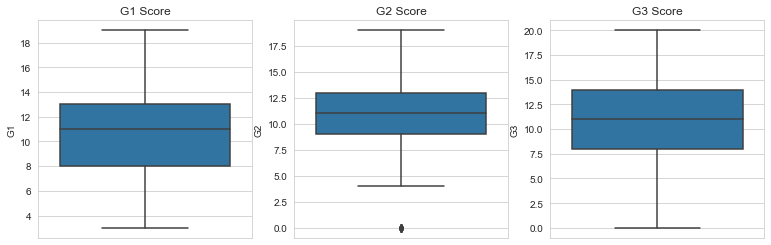

In [28]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxplot(y=data.G1)
plt.title('G1 Score')

plt.subplot(132)
sns.boxplot(y=data.G2)
plt.title('G2 Score')

plt.subplot(133)
sns.boxplot(y=data.G3)
plt.title('G3 Score');

Analysis by school:

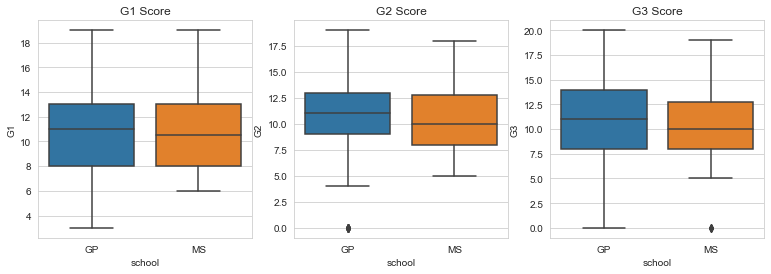

In [29]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxplot(x=data.school, y=data.G1)
plt.title('G1 Score')

plt.subplot(132)
sns.boxplot(x=data.school, y=data.G2)
plt.title('G2 Score')

plt.subplot(133)
sns.boxplot(x=data.school, y=data.G3)
plt.title('G3 Score');

We can include more information in the graphs using the `hue` parameter.

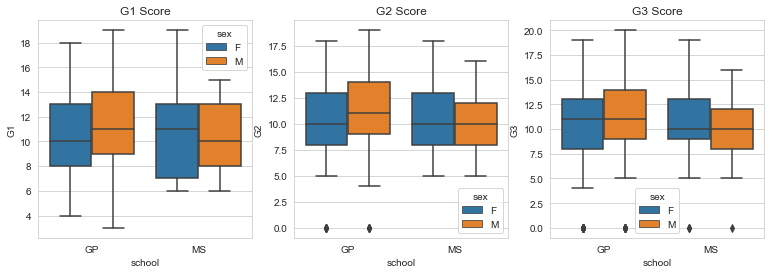

In [30]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxplot(x=data.school, y=data.G1, hue=data.sex)
plt.title('G1 Score')

plt.subplot(132)
sns.boxplot(x=data.school, y=data.G2, hue=data.sex)
plt.title('G2 Score')

plt.subplot(133)
sns.boxplot(x=data.school, y=data.G3, hue=data.sex)
plt.title('G3 Score');

## Boxen Plot 

A `boxenplot` is an enhanced box plot. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

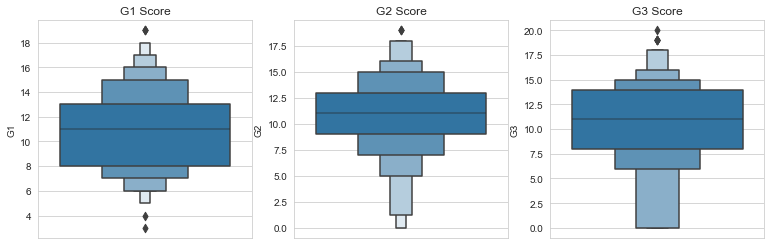

In [31]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxenplot(y=data.G1)
plt.title('G1 Score')

plt.subplot(132)
sns.boxenplot(y=data.G2)
plt.title('G2 Score')

plt.subplot(133)
sns.boxenplot(y=data.G3)
plt.title('G3 Score');

Analysis by school:

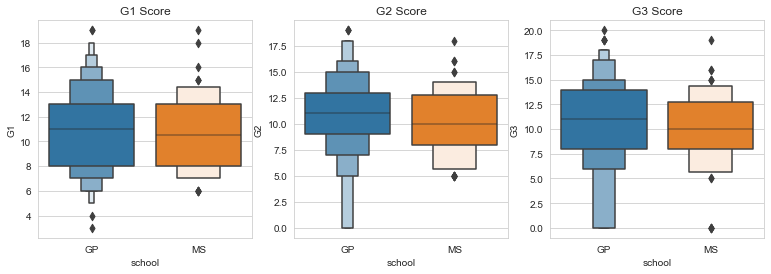

In [32]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxenplot(x=data.school, y=data.G1)
plt.title('G1 Score')

plt.subplot(132)
sns.boxenplot(x=data.school, y=data.G2)
plt.title('G2 Score')

plt.subplot(133)
sns.boxenplot(x=data.school, y=data.G3)
plt.title('G3 Score');

Analysis by school and sex:

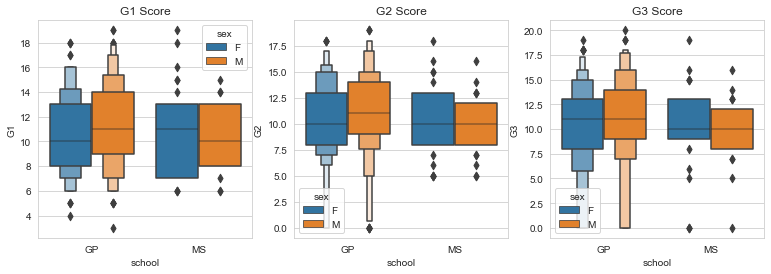

In [33]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.boxenplot(x=data.school, y=data.G1, hue=data.sex)
plt.title('G1 Score')

plt.subplot(132)
sns.boxenplot(x=data.school, y=data.G2, hue=data.sex)
plt.title('G2 Score')

plt.subplot(133)
sns.boxenplot(x=data.school, y=data.G3, hue=data.sex)
plt.title('G3 Score');

## Violin Plot 

A `violinplot` plays a similar role as a `boxplot` and a `boxenplot`. It shows the distribution of quantitative data across several levels of one (or more) categorical variables. The violin plot features a kernel density estimation of the underlying distribution.

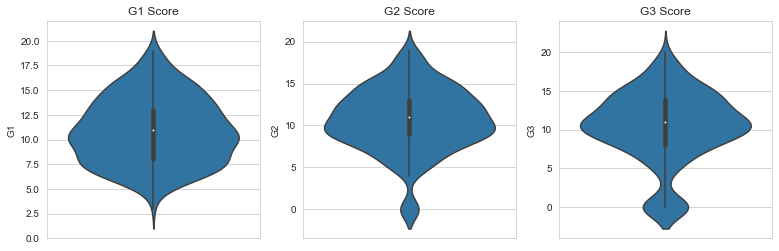

In [34]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.violinplot(y=data.G1)
plt.title('G1 Score')

plt.subplot(132)
sns.violinplot(y=data.G2)
plt.title('G2 Score')

plt.subplot(133)
sns.violinplot(y=data.G3)
plt.title('G3 Score');

Analysis by school:

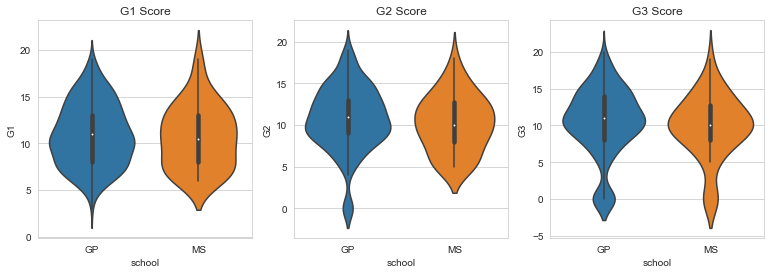

In [35]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.violinplot(x=data.school, y=data.G1)
plt.title('G1 Score')

plt.subplot(132)
sns.violinplot(x=data.school, y=data.G2)
plt.title('G2 Score')

plt.subplot(133)
sns.violinplot(x=data.school, y=data.G3)
plt.title('G3 Score');

Analysis by school and sex:

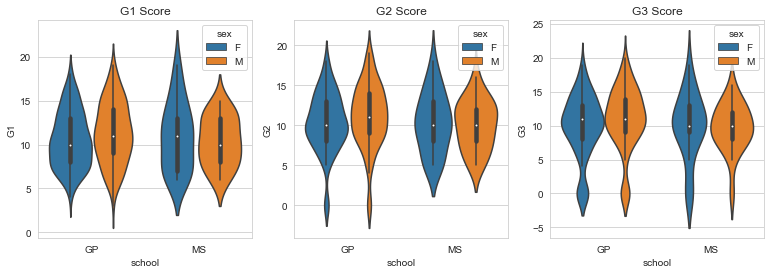

In [36]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.violinplot(x=data.school, y=data.G1, hue=data.sex)
plt.title('G1 Score')

plt.subplot(132)
sns.violinplot(x=data.school, y=data.G2, hue=data.sex)
plt.title('G2 Score')

plt.subplot(133)
sns.violinplot(x=data.school, y=data.G3, hue=data.sex)
plt.title('G3 Score');

The option `split = True` will draw half of a violin for each level.

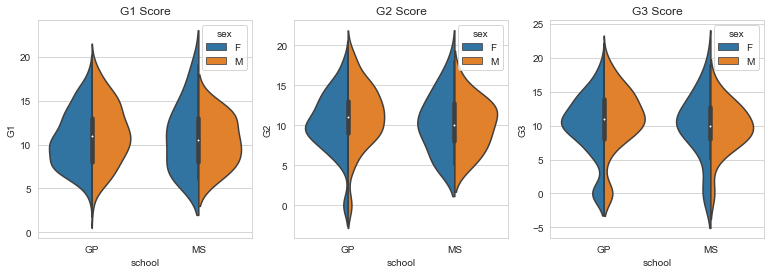

In [37]:
plt.figure(figsize=(13,4))

plt.subplot(131)
sns.violinplot(x=data.school, y=data.G1, split=True, hue=data.sex)
plt.title('G1 Score')

plt.subplot(132)
sns.violinplot(x=data.school, y=data.G2, split=True, hue=data.sex)
plt.title('G2 Score')

plt.subplot(133)
sns.violinplot(x=data.school, y=data.G3, split=True, hue=data.sex)
plt.title('G3 Score');

References:
- Nussbaumer Knaflic, C. (2015) Storytelling with data. A data visualization guide for business professionals. USA: John Wiley & Sons. chapter 2
- Unpingco, J. (2019) Python for Probability, Statistics, and Machine Learning, USA: Springer